<a href="https://colab.research.google.com/github/Joe14th/MachineLearning/blob/master/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.__version__

'1.13.1'

In [0]:
#28x28 images og hand-written digits 0-9
mnist = tf.keras.datasets.mnist

In [4]:
#unpack training and testing set
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#normalize pixel data (0-1)
xtrain = tf.keras.utils.normalize(xtrain, axis=1)
xtest = tf.keras.utils.normalize(xtest, axis=1)

In [14]:
#build model (feed foward model)
model = tf.keras.models.Sequential()
#first layer is input layer
#want to flatten image
model.add(tf.keras.layers.Flatten())
#hidden layers (2 of them)
#128 units(neurons), activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#output layer
#number of classifications, 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#parameters for the training of the model
#optimiser, degree of error
#(the way loss is calculised can cause a huge impact - accuracy)
#metrics we want to track
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#train model
#epochs = full pass, how many times the model saw/passsed over your dataset
model.fit(xtrain, ytrain, epochs=3)


Epoch 1/3
60000/60000 [==============================] - 10s 172us/sample - loss: 0.2579 - acc: 0.9259
Epoch 2/3
60000/60000 [==============================] - 10s 159us/sample - loss: 0.1043 - acc: 0.9685
Epoch 3/3
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0710 - acc: 0.9777


In [15]:
#calculate validation loss and accuracy
#should expect accuracy to be slightly lower and loss slightly higher
vallos, valacc = model.evaluate(xtest, ytest)
print(vallos, valacc)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.0898 - acc: 0.9706
0.08980491116414778 0.9706


In [23]:
#save a model
model.save('epic_num_reader_model')
#reload model
new_model = tf.keras.models.load_model('epic_num_reader_model')
#make a prediction
#predictions = new_model.predict([xtest])
predictions = model.predict([xtest])
print(predictions)

[[7.4191560e-09 2.4491236e-08 1.0435149e-07 ... 9.9999952e-01
  2.7232723e-08 2.4637464e-08]
 [1.4485725e-08 7.1027568e-03 9.9284267e-01 ... 1.1057157e-07
  3.6140325e-06 3.3904277e-09]
 [8.8885315e-07 9.9911207e-01 5.1354891e-05 ... 3.6878304e-05
  7.5170962e-04 8.3347559e-06]
 ...
 [8.7545438e-09 1.3302953e-06 9.2265218e-09 ... 2.5334446e-05
  7.0769397e-07 5.3936881e-05]
 [7.9738911e-06 1.3698070e-07 6.1702101e-09 ... 1.0599459e-06
  1.9494749e-03 9.5059194e-10]
 [3.6833657e-07 2.3758188e-08 1.1399825e-08 ... 1.0677526e-09
  2.0789571e-07 4.9438715e-09]]


In [25]:
import numpy as np
#prediction for index 0 is 7
print(np.argmax(predictions[0]))

7


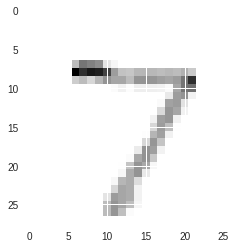

In [26]:
plt.imshow(xtest[0])
plt.show()

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

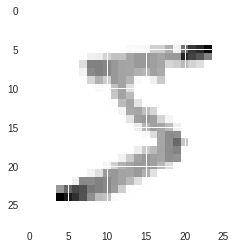

In [11]:
import matplotlib.pyplot as plt

plt.imshow(xtrain[0], cmap = plt.cm.binary)
plt.show
print(xtrain[0])